# Basic Sentiment Analysis

We count 'positive' and 'negative' words and use differences or ratios or windowed averages as a measure of sentiment.   This is highly problematic!


* This food is not very good! (Negation)
* This lavishly produced movie was blllleeeeccchhh! (Unknown words)
* Dr. Strange is the goat (slang)
* Sure I enjoyed my visit to this air bnb but then again I really enjoy the stacatto thrum of jack hammers at 4am. (Sarcasm)

In [1]:
# Read a list of words
def read_words(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
    return [w.strip() for w in lines]

pos = read_words('positive-words.txt')
neg = read_words('negative-words.txt')

In [2]:
# Read and clean some raw text
def text_to_words(filename):
    """ Convert everything to lower case. Remove punctuation,
    new lines, and extra white space """

    non_letters = "0123456789!@#$%^&*()_+-=';:.,></?\""
    
    with open(filename, 'r') as file:
        text = file.read()
    
    text = text.lower()
    for char in non_letters:
        text = text.replace(char, '')

    text = text \
        .replace("\n", " ") \
        .replace("\t", " ") \
        .replace("  ", " ")  # remove extra whitespace
    return text.split()

limit = 50000 # Number of words to extract from text files
obama = text_to_words('obama.txt')[:limit]
trump = text_to_words('trump.txt')[:limit]

In [3]:
def sentiment(words):
    """ convert word list to list of -1, 0, 1
    for negative, neutral, positive words """
    sent = []
    for word in words:
        if word in pos:
            sent.append(1)
        elif word in neg:
            sent.append(-1)
        else:
            sent.append(0)
    return sent

sent_obama = sentiment(obama)
sent_trump = sentiment(trump)

print(sum(sent_obama)/limit, sum(sent_trump)/limit)
print("obama:", sent_obama.count(-1), sent_obama.count(0), sent_obama.count(1))
print("trump:", sent_trump.count(-1), sent_trump.count(0), sent_trump.count(1))



0.01446 0.01658
obama: 1318 46641 2041
trump: 1335 46501 2164


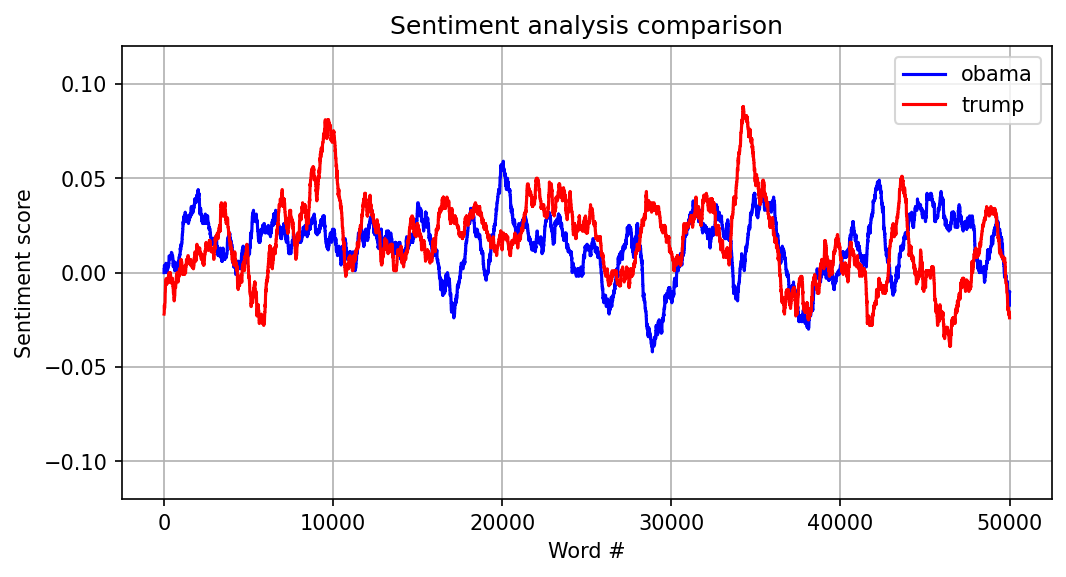

In [4]:
import matplotlib.pyplot as plt
import dataproc as dp

def plot_sentiment(sent1, sent2, labels=["1", "2"]):
    
    sz = 1000
    mavg1 = dp.moving_average(sent1, window_size=sz)
    mavg2 = dp.moving_average(sent2, window_size=sz)
    #plt.scatter(range(len(sent)),sent, marker='.')
    plt.figure(figsize=(8,4), dpi=150)
    plt.plot(mavg1, label=labels[0], color='b')
    plt.plot(mavg2, label=labels[1], color='r')
    plt.title("Sentiment analysis comparison")
    plt.xlabel("Word #")
    plt.ylabel("Sentiment score")
    plt.ylim(-0.12, 0.12)
    plt.grid()
    plt.legend()
    plt.savefig('sentiment.png')
    plt.show()

plot_sentiment(sent_obama, sent_trump, labels = ['obama', 'trump'])